In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
import os
import cv2

# Image Segmentation

In [146]:
from keras.preprocessing.image import load_img,img_to_array

In [327]:
image = cv2.imread("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/A/img011-00010.png")

In [328]:
image.shape

(51, 43, 3)

In [329]:
image = cv2.resize(image,(224,224))

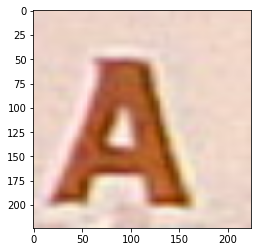

In [330]:
plt.imshow(image)

In [280]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

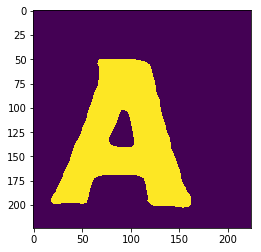

In [281]:
plt.imshow(thresh)

In [282]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [283]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

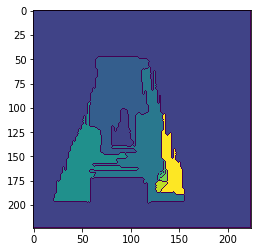

In [284]:
plt.imshow(markers)
plt.show()

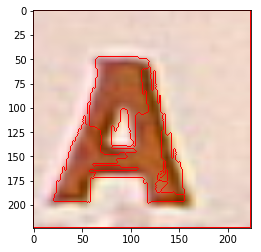

In [285]:
plt.imshow(image)
plt.show()

# Preprocessing the image and msk dataset

In [153]:
data_image = []

In [154]:
for i in os.listdir("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/"):
    if(i!=".DS_Store"):
        for j in os.listdir("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/" + i):
            label = i
            if(j!=".DS_Store"):
                image = load_img("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/" + i + "/" + j,target_size=(224,224))
                image = img_to_array(image)
                image = image.astype('float32')/255
                data_image.append([image,label])

In [155]:
data_image

[[array([[[0.16862746, 0.16862746, 0.37254903],
          [0.16862746, 0.16862746, 0.37254903],
          [0.16862746, 0.16862746, 0.37254903],
          ...,
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ]],
  
         [[0.16862746, 0.16862746, 0.37254903],
          [0.16862746, 0.16862746, 0.37254903],
          [0.16862746, 0.16862746, 0.37254903],
          ...,
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ]],
  
         [[0.16470589, 0.16470589, 0.3764706 ],
          [0.16470589, 0.16470589, 0.3764706 ],
          [0.16470589, 0.16470589, 0.3764706 ],
          ...,
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ],
          [0.16470589, 0.15686275, 0.4117647 ]],
  
         ...,
  
         [[0.14117648, 0.14117648, 0.3764706 ],
          [0.1

In [156]:
data_image = np.array(data_image)

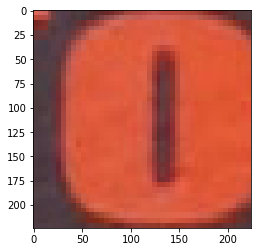

In [160]:
plt.imshow(data_image[101][0])
plt.show()

In [ ]:
np.shape(data_image[100][0])

In [161]:
len(data_image)

7705

In [163]:
np.shape(data_image)

(7705, 2)

In [324]:
data_msk = []

In [325]:
for i in os.listdir("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/"):
    if(i!=".DS_Store"):
        for j in os.listdir("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/" + i):
            label = i
            if(j!=".DS_Store"):
                image = cv2.imread("/Users/syedshakeeb/Downloads/English/Img/GoodImg/Bmp/" + i + "/" + j)
                image = cv2.resize(image,(224,224))
                data_msk.append([image,label])

In [326]:
np.shape(data_msk[100][0])

(224, 224, 3)

In [350]:
for i in range(len(data_msk)):
    
    image = data_msk[i][0]
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    markers = cv2.watershed(image,markers)
    image[markers == -1] = [255,0,0]
    
    data_msk[i][0] = markers
    
    #plt.imshow(markers)
    #plt.show()

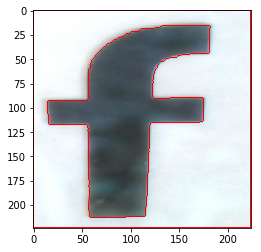

In [349]:
plt.imshow(data_msk[200][0])

In [338]:
np.shape(data_msk[1000][0])

(224, 224, 3)

# Splitting the data into seperate image along with each label

In [110]:
data_image_camera = []
data_image_label = [] 
data_msk_camera = []
data_msk_label = []

In [111]:
for i in range(len(data_image)):
    data_image_camera.append(data_image[i][0])
    data_image_label.append(data_image[i][1])

 h


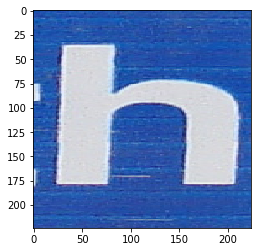

In [113]:
plt.imshow(data_image_camera[10])
print(data_image_label[10])

In [112]:
for i in range(len(data_msk)):
    data_msk_camera.append(data_msk[i][0])
    data_msk_label.append(data_msk[i][1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 h


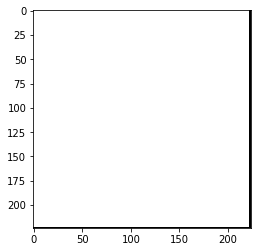

In [114]:
plt.imshow(data_msk_camera[10])
print(data_msk_label[10])

# Splitting the data into training and testing dataset

In [164]:
data_train_image = []
data_train_image_label = []
data_valid_image = []
data_valid_image_label = []

In [165]:
data_train_msk = []
data_train_msk_label = []
data_valid_msk = []
data_valid_msk_label = []

In [166]:
import random

In [167]:
random_number = []

In [168]:
for i in range(5000):
    j = random.randint(0,5000)
    random_number.append(j)

In [169]:
random_number

[3160,
 2818,
 1338,
 725,
 216,
 4548,
 1275,
 2442,
 250,
 2090,
 2782,
 1905,
 4746,
 1304,
 3762,
 2699,
 3705,
 3228,
 4057,
 3594,
 2494,
 4761,
 1897,
 2226,
 2908,
 767,
 1286,
 1529,
 812,
 3217,
 1251,
 3086,
 86,
 1260,
 1915,
 649,
 4223,
 2910,
 3626,
 4417,
 2953,
 2580,
 1002,
 2744,
 4891,
 4190,
 2491,
 2780,
 1774,
 2194,
 2436,
 444,
 1308,
 4141,
 3246,
 838,
 883,
 2379,
 3681,
 2608,
 3950,
 980,
 1104,
 4278,
 2408,
 2422,
 3589,
 1077,
 1855,
 211,
 355,
 2186,
 1272,
 2330,
 2269,
 4293,
 1074,
 4854,
 4812,
 3186,
 3395,
 4984,
 1867,
 2200,
 363,
 2136,
 3771,
 800,
 817,
 782,
 437,
 868,
 1422,
 1126,
 1412,
 3545,
 3706,
 1378,
 4709,
 3488,
 3160,
 839,
 2233,
 4213,
 504,
 1646,
 3582,
 941,
 516,
 10,
 2470,
 1461,
 214,
 3572,
 1351,
 4830,
 2345,
 2265,
 2342,
 3385,
 2642,
 3508,
 2860,
 1011,
 223,
 1259,
 1649,
 3721,
 2311,
 1060,
 4129,
 749,
 4164,
 813,
 3433,
 2218,
 3123,
 2075,
 2919,
 3781,
 2999,
 907,
 3069,
 2248,
 4946,
 489,
 3129,
 84

In [170]:
for i in range(len(random_number)):
    j = random_number[i]
    data_valid_image.append(data_image[j][0])
    data_valid_image_label.append(data_image[j][1])

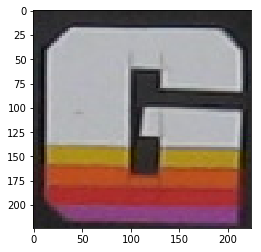

G


In [171]:
plt.imshow(data_valid_image[20])
plt.show()
print(data_valid_image_label[20])

In [172]:
for i in range(len(data_image)):
    data_train_image.append(data_image[i][0])
    data_train_image_label.append(data_image[i][1])

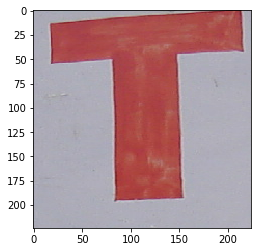

T


In [173]:
plt.imshow(data_train_image[3000])
plt.show()
print(data_train_image_label[3000])

In [174]:
for i in range(len(random_number)):
    j = random_number[i]
    data_valid_msk.append(data_msk[j][0])
    data_valid_msk_label.append(data_msk[j][1])

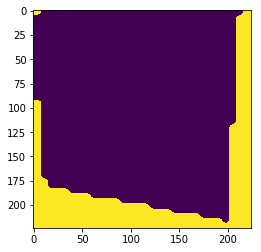

 n


In [175]:
plt.imshow(data_valid_msk[25])
plt.show()
print(data_valid_msk_label[25])

In [176]:
for i in range(len(data_image)):
    data_train_msk.append(data_msk[i][0])
    data_train_msk_label.append(data_msk[i][1])

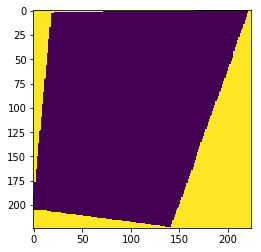

 f


In [177]:
plt.imshow(data_train_msk[201])
plt.show()
print(data_train_msk_label[201])

In [180]:
data_train_image = np.array(data_train_image)
data_train_image_label = np.array(data_train_image_label)
data_valid_image = np.array(data_valid_image)
data_valid_image_label = np.array(data_valid_image_label)

In [208]:
data_train_msk_label = np.array(data_train_msk_label)
data_valid_msk_label = np.array(data_valid_msk_label)

In [183]:
data_train_image.shape

(7705, 224, 224, 3)

In [195]:
for i in range(len(data_train_image_label)):
    data_train_image_label[i] = data_train_image_label[i].strip()

In [196]:
for i in range(len(data_valid_image_label)):
    data_valid_image_label[i] = data_valid_image_label[i].strip()

In [198]:
for i in range(len(data_train_msk_label)):
    data_train_msk_label[i] = data_train_msk_label[i].strip() 

In [199]:
for i in range(len(data_valid_msk_label)):
    data_valid_msk_label[i] = data_valid_msk_label[i].strip()

In [202]:
from sklearn.preprocessing import LabelBinarizer

In [203]:
label_binarizer = LabelBinarizer()

In [204]:
data_train_image_label = label_binarizer.fit_transform(data_train_image_label)

In [205]:
data_valid_image_label = label_binarizer.fit_transform(data_valid_image_label)

In [210]:
data_train_msk_label = label_binarizer.fit_transform(data_train_msk_label)

In [211]:
data_valid_msk_label = label_binarizer.fit_transform(data_valid_msk_label)

# Transfer Learning

In [331]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19

In [347]:
#for predicting the image camera for each alphabet
model1_resnet1 = ResNet50(weights='imagenet',input_shape=(224,224,3))

In [348]:
#for predicting the image camera for each alphabet
model2_vgg1 =VGG19(weights='imagenet',input_shape=(224,224,3))

In [136]:
model1_resnet1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [138]:
model2_vgg2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________